<a id="content"></a>
На данных Яндекс Музыки сравнить поведение пользователей Москвы и Петербурга

**Цель исследования** — проверить три гипотезы:
1. Активность пользователей зависит от дня недели. в Москве и Петербурге это проявляется по-разному.
2. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.В
3. В понедельник утром в Москве и Питере преобладают разные жанры. вечером пятницы в Москве и Питере преобладают разные жанры


**Ход исследования**

О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

проверить данные на ошибки и оценить их влияние на исследование.исправить самые критичные ошибки данных на этапе предобработки.
 
исследование пройдёт в четыре этапа:
 1. [Обзор данных](#summary)
 2. [Предобработка данных](#eda)
 3. [Проверка гипотез](#testing)
 4. [Подведение итогов и написание выводов](#result)



<a id="summary"></a>
### Обзор данных

Составим первое представление о данных Яндекс Музыки.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\Freo\\Desktop\\projects\\datasets\\p0.csv')

In [3]:
print(df.head(10))

     userID                        Track            artist   genre  \
0  FFB692EC            Kamigata To Boots  The Mass Missile    rock   
1  55204538  Delayed Because of Accident  Andreas Rönnberg    rock   
2    20EC38            Funiculì funiculà       Mario Lanza     pop   
3  A3DD03C9        Dragons in the Sunset        Fire + Ice    folk   
4  E2DC1FAE                  Soul People        Space Echo   dance   
5  842029A1                    Преданная         IMPERVTOR  rusrap   
6  4CB90AA5                         True      Roman Messer   dance   
7  F03E1C1F             Feeling This Way   Polina Griffith   dance   
8  8FA1D3BE     И вновь продолжается бой               NaN  ruspop   
9  E772D5C0                    Pessimist               NaN   dance   

             City        time        Day  
0  Saint-Petersburg  20:28:33  Wednesday  
1            Moscow  14:07:09     Friday  
2  Saint-Petersburg  20:58:07  Wednesday  
3  Saint-Petersburg  08:37:09     Monday  
4            M

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


в таблице семь столбцов. Тип данных во всех столбцах — `object`.

Согласно документации к данным:
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.

Количество значений в столбцах различается, значит, в данных есть пропущенные значения.

**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку. 

Предварительно можно утверждать, что данных достаточно для проверки гипотез. в данных встречаются пропуски

<a id="eda"></a>
## Предобработка данных


переименовать столбцы
обработать пропущенные значения и дубликаты

In [5]:
print(df.columns)

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')


In [6]:
new_columns = {
    '  userID':'user_id',
    'Track':'track',
    '  City  ':'city',
    'Day':'day'
}
df=df.rename(columns=new_columns)

In [7]:
print(df.columns)

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')


### Пропуски



In [8]:
print(df.isna().sum())


user_id       0
track      1231
artist     7203
genre      1198
city          0
time          0
day           0
dtype: int64


пропуски в `track` и `artist` не важны для исследования, заменим их явными обозначениями.

пропуски в `genre` могут помешать сравнению музыкальных вкусов в Москве и Санкт-Петербурге.
* заполним и эти пропуски явными обозначениями;
* оценим, насколько они повредят расчётам. 

In [9]:
columns_to_replace = ['track','artist','genre']
for column in columns_to_replace:
    df[column] = df[column].fillna('unknown')


In [10]:
print(df.isna().sum())

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64


### Дубликаты

In [11]:
print(df.duplicated().sum())


3826


In [12]:
df=df.drop_duplicates()

In [13]:
print(df.duplicated().sum())

0


рассмотрим значения столбца жанра чтобы найти неявные дубликаты

In [14]:
print(df['genre'].sort_values().unique())

['acid' 'acoustic' 'action' 'adult' 'africa' 'afrikaans' 'alternative'
 'alternativepunk' 'ambient' 'americana' 'animated' 'anime' 'arabesk'
 'arabic' 'arena' 'argentinetango' 'art' 'audiobook' 'author' 'avantgarde'
 'axé' 'baile' 'balkan' 'beats' 'bigroom' 'black' 'bluegrass' 'blues'
 'bollywood' 'bossa' 'brazilian' 'breakbeat' 'breaks' 'broadway'
 'cantautori' 'cantopop' 'canzone' 'caribbean' 'caucasian' 'celtic'
 'chamber' 'chanson' 'children' 'chill' 'chinese' 'choral' 'christian'
 'christmas' 'classical' 'classicmetal' 'club' 'colombian' 'comedy'
 'conjazz' 'contemporary' 'country' 'cuban' 'dance' 'dancehall' 'dancepop'
 'dark' 'death' 'deep' 'deutschrock' 'deutschspr' 'dirty' 'disco' 'dnb'
 'documentary' 'downbeat' 'downtempo' 'drum' 'dub' 'dubstep' 'eastern'
 'easy' 'electronic' 'electropop' 'emo' 'entehno' 'epicmetal' 'estrada'
 'ethnic' 'eurofolk' 'european' 'experimental' 'extrememetal' 'fado'
 'fairytail' 'film' 'fitness' 'flamenco' 'folk' 'folklore' 'folkmetal'
 'folkrock' 

In [15]:
df['genre'] = df['genre'].replace(['hip','hop','hip-hop'],'hiphop')
df['genre'] = df['genre'].replace('afrikaans','africa')
df['genre'] = df['genre'].replace('animated','anime')
df['genre'] = df['genre'].replace('электроника','electronic')
df['genre'] = df['genre'].replace('türk','türkçe')

**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

исправили заголовки, чтобы упростить работу с таблицей. Без дубликатов исследование станет более точным.

Пропущенные значения заменили на 'unknown'. Ещё предстоит увидеть, не повредят ли исследованию пропуски в колонке 'genre'.

<a id="testing"></a>

<a id="testing"></a>
## Проверка гипотез

### Сравнение поведения пользователей двух 

Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Проверим это сравнив данные по понедельнику, среде и пятнице.

* Разделим пользователей Москвы и Санкт-Петербурга.
* Сравним, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.

In [16]:
city_grp = df.groupby('city')['track'].count()
print(city_grp)

city
Moscow              42741
Saint-Petersburg    18512
Name: track, dtype: int64


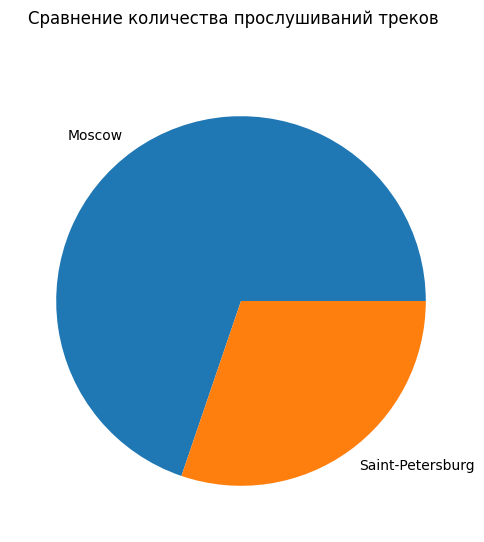

In [17]:
city_grp.plot(kind ='pie',figsize=(6,6), subplots=True, title='Сравнение количества прослушиваний треков')
plt.gca().get_yaxis().set_visible(False)
plt.show()

В Москве прослушиваний больше, чем в Петербурге. Из этого не следует, что московские пользователи чаще слушают музыку. Просто самих пользователей в Москве больше.



In [18]:
day_grp = df.groupby('day')['track'].count()
print(day_grp)

day
Friday       21840
Monday       21354
Wednesday    18059
Name: track, dtype: int64


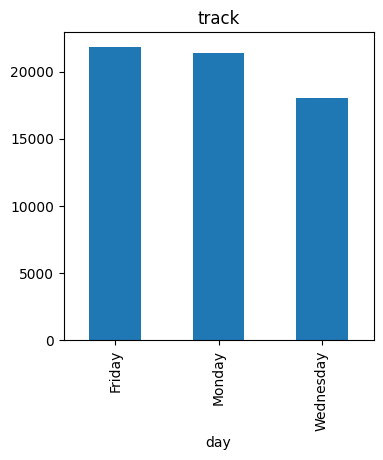

In [19]:
day_grp.plot(kind ='bar',figsize=(4,4), subplots=True)
plt.show()

В среднем пользователи из двух городов менее активны по средам. Рассмотрим каждый город в отдельности.

In [20]:
def number_tracks(day, city):
    track_list=df[df['day']==day]
    track_list=track_list[track_list['city']==city]
    track_list_count=track_list['user_id'].count()    
    return track_list_count

In [21]:
m_m = number_tracks('Monday','Moscow')
m_spb = number_tracks('Monday','Saint-Petersburg')
w_m = number_tracks('Wednesday','Moscow')
w_spb = number_tracks('Wednesday','Saint-Petersburg')
f_m = number_tracks('Friday','Moscow')
f_spb = number_tracks('Friday','Saint-Petersburg')

In [22]:
columns_for_df=['Moscow','Saint-Petersburg']
data_count=[[m_m,m_spb],[w_m,w_spb],[f_m,f_spb]]

result_table_mwf = pd.DataFrame(data=data_count,columns=columns_for_df, index=['monday', 'wednesday', 'friday'])
display(result_table_mwf)

,Moscow,Saint-Petersburg
monday,15740,5614
wednesday,11056,7003
friday,15945,5895


<Axes: >

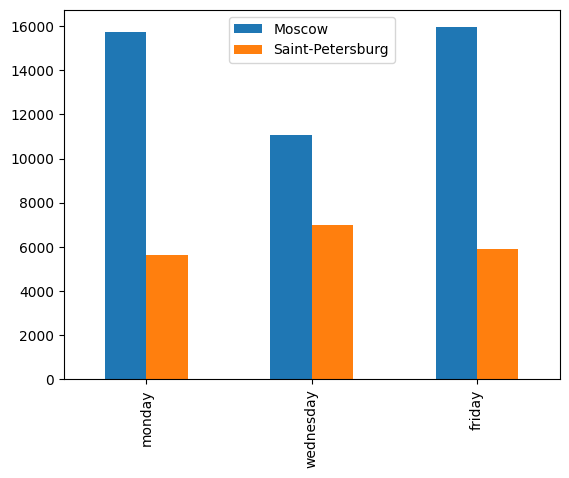

In [23]:
result_table_mwf.plot(kind='bar')

**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам, а в понедельник и пятницу спад.

данные говорят в пользу первой гипотезы.

проверим вторую гипотезу:
* утром в понедельник в преобладают разные жанры 
* вечером пятницы преобладают разные жанры

In [24]:
moscow_general = df[df['city']=='Moscow']
spb_general = df[df['city']=='Saint-Petersburg']

создадим функцию 'genre_weekday' с параметрами table, day, time1, time2, которая возвращает информацию о самых популярных жанрах в указанный день в заданное время

In [25]:
def genre_weekday(df, day, time1, time2):
    genre_df = df[df['day']==day]
    genre_df = genre_df[genre_df['time']<=time2]
    genre_df = genre_df[genre_df['time']>=time1]
    genre_df_count = genre_df.groupby('genre')['genre'].count()
    genre_df_sorted = genre_df_count.sort_values(ascending=False)
    return genre_df_sorted[:10]

Cравним результаты функции `genre_weekday()` для Москвы и Санкт-Петербурга в понедельник утром (с 7:00 до 11:00) и в пятницу вечером (с 17:00 до 23:00):

In [26]:
print(genre_weekday(moscow_general,'Monday','07:00','11:00'))

genre
pop            781
dance          549
electronic     480
rock           474
hiphop         286
ruspop         186
world          181
rusrap         175
alternative    164
unknown        161
Name: genre, dtype: int64


In [27]:
print(genre_weekday(spb_general,'Monday','07:00','11:00'))


genre
pop            218
dance          182
rock           162
electronic     147
hiphop          80
ruspop          64
alternative     58
rusrap          55
jazz            44
classical       40
Name: genre, dtype: int64


In [28]:
print(genre_weekday(moscow_general,'Friday','17:00','23:00'))


genre
pop            713
rock           517
dance          495
electronic     482
hiphop         273
world          208
ruspop         170
alternative    163
classical      163
rusrap         142
Name: genre, dtype: int64


In [29]:
print(genre_weekday(spb_general,'Friday','17:00','23:00'))

genre
pop            256
electronic     216
rock           216
dance          210
hiphop          97
alternative     63
jazz            61
classical       60
rusrap          59
world           54
Name: genre, dtype: int64


**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге

Гипотеза: в Москве и СПБ разные жанровые предпочтения

In [30]:
moscow_genres=moscow_general.groupby('genre')['genre'].count().sort_values(ascending=False)
spb_genres=spb_general.groupby('genre')['genre'].count().sort_values(ascending=False)

In [31]:
print(moscow_genres.head(10))

genre
pop            5892
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1379
ruspop         1372
rusrap         1161
Name: genre, dtype: int64


In [32]:
print(spb_genres.head(10))

genre
pop            2431
dance          1932
rock           1879
electronic     1737
hiphop          960
alternative     649
classical       646
rusrap          564
ruspop          538
world           515
Name: genre, dtype: int64


**Выводы**

Гипотеза о разнице в любимых жарнров не подтвердилась:
* Поп-музыка — самый популярный жанр в обоих городах, да и весь топ10 сильно совпадает


<a id="result"></a>
## Итоги исследования

проверили три гипотезы и установили:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают Московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.

